In [1]:
#Data handling Libraries
import pandas as pd
import numpy as np
import scipy
from scipy.sparse import csr_matrix

#Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Validation Split
from sklearn.model_selection import train_test_split

#Data Visualization Libraries
import matplotlib.pyplot as plt

# Text Cleaning Libraries
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stops = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaghn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


## For performing sentiment analysis, can you pickup which columns would be useful?

In [3]:
df_sent = df[["airline_sentiment","text"]]
# To perform sentiment analysis we need the airline_sentiment and the text.

## There are three sentiment positive, negative & neutral. What is the average count of each sentiment?


<AxesSubplot:>

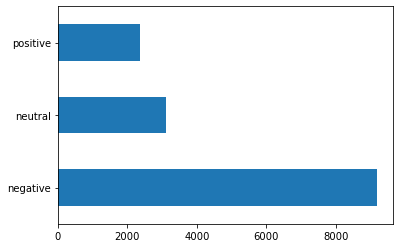

In [4]:
df["airline_sentiment"].value_counts().plot(kind="barh")
# The max sentiments is followed by below graph is negative then neutral then positive

## What are some of thecommon negative feedbacks given?
## What is the most common negative feedback given?

<AxesSubplot:>

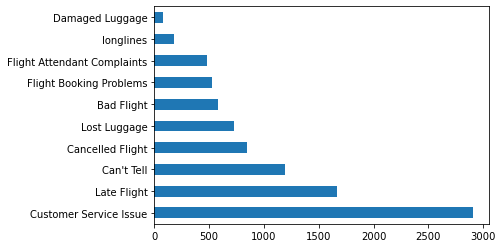

In [5]:
df["negativereason"].value_counts().plot(kind="barh")
# from the below graph we can conclude the maximum common negative feedbacks

## How many different airlines are present in the dataset?

<AxesSubplot:>

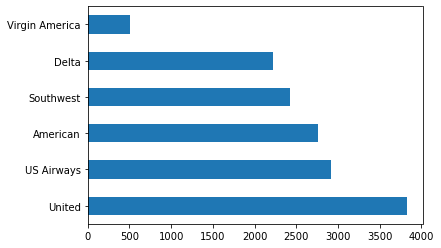

In [6]:
df["airline"].value_counts().plot(kind="barh")
# From below graph we see the different types of airline

## Could you generate the no. of sentiments of each airline from the data?
## Which airline has the maximum negative sentiments?

In [7]:
df_airline_sentiment = pd.crosstab(df["airline"],df["airline_sentiment"])


<AxesSubplot:xlabel='airline'>

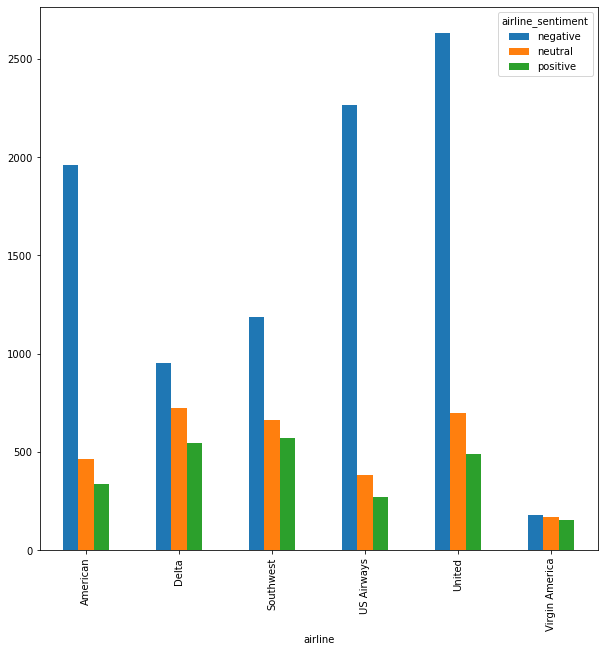

In [8]:
df_airline_sentiment.plot(kind="bar",figsize=(10,10))
# From below graph we conclude the United states have maximum negative feedback

## Is there a specific day where a lot of negative feedbacks were given?

In [9]:
df["tweet_created"] = pd.to_datetime(df["tweet_created"]).dt.strftime("%d-%m-%Y")

In [10]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015,NaN,Pacific Time (US & Canada)


In [11]:
df_date_time = pd.crosstab(df["tweet_created"],df["airline_sentiment"])

<AxesSubplot:xlabel='tweet_created'>

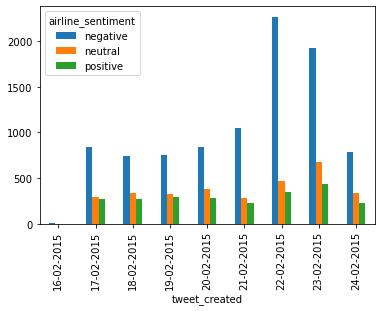

In [12]:
df_date_time.plot(kind="bar")

## Data Cleaning

In [13]:
df_sent

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [14]:
# Text cleaning is one of the impoortant steps in deep learning model building
# In order yo do text cleaning we use 2 libraries namely NLTK - Natural Language Tool Kit and Regex - Regular expression

In [15]:
def data_cleaning(text):
    text = text.lower() # convert everything into lower case
    text = re.sub("[^a-z]"," ",text) # ("allow","replace","data")
    words = text.split()  # Split the entire sentence into words
    imp_words = [w for w in words if w not in stops] # Picking up only imp words after filtering out the stop words
    
    return(" ".join(imp_words))

In [16]:
demo = "India, officially the Republic of India (Hindi: Bhārat Gaṇarājya),[26] is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast."

In [17]:
data_cleaning(demo)

'india officially republic india hindi bh rat ga ar jya country south asia seventh largest country area second populous country populous democracy world bounded indian ocean south arabian sea southwest bay bengal southeast'

In [18]:
df_sent["cleaned_text"] = df["text"].apply(lambda x : data_cleaning(x) ) 

C:\Users\gaghn\AppData\Local\Temp/ipykernel_11044/2698929073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["cleaned_text"] = df["text"].apply(lambda x : data_cleaning(x) )


In [19]:
df_sent.head()

,airline_sentiment,text,cleaned_text
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [20]:
le = LabelEncoder()

In [21]:
df_sent["airline_sentiment"] = le.fit_transform(df_sent["airline_sentiment"])
# 1 = Neutral ,  2 = Positive , 0 = Negative

C:\Users\gaghn\AppData\Local\Temp/ipykernel_11044/3814891589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent["airline_sentiment"] = le.fit_transform(df_sent["airline_sentiment"])


In [22]:
df_sent

,airline_sentiment,text,cleaned_text
0,1,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,1,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing
...,...,...,...
14635,2,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...
14637,1,@AmericanAir Please bring American Airlines to...,americanair please bring american airlines bla...
14638,0,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...


In [23]:
x = df_sent["cleaned_text"]
y = df_sent["text"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
# We always fit_transform training data and transform the test data
tf_idf = TfidfVectorizer()

In [26]:
x_train_tf = tf_idf.fit_transform(x_train)
x_test_tf = tf_idf.transform(x_test)

In [27]:
len(tf_idf.get_feature_names())

11125

In [28]:
x_train = csr_matrix.todense(x_train_tf)
x_test = csr_matrix.todense(x_test_tf)

In [29]:
# In the first layer give 11000 neurons
# In the 2nd layer give 128 neurons
# In third layer give 3 neurons
# Since this is lable encoded we use sparse cotegorical cross entropy